In [38]:
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

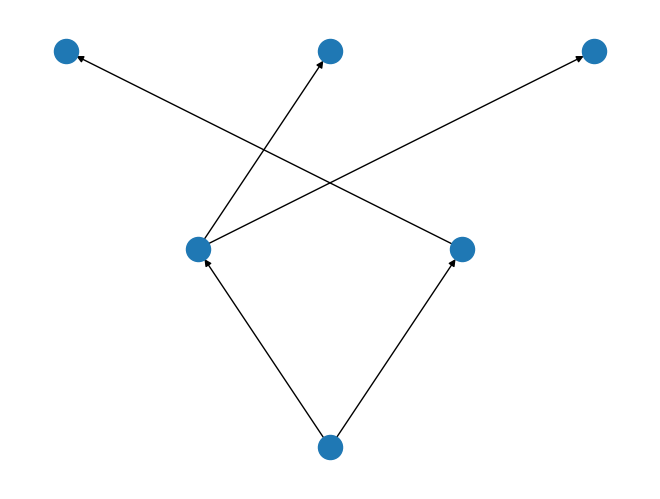

In [56]:
DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (1, 3), (3, 4), (3, 5), (2, 6)])

DG.nodes[1]['res'] = 1
DG.nodes[2]['res'] = 2
DG.nodes[3]['res'] = 2
DG.nodes[4]['res'] = 3
DG.nodes[5]['res'] = 3
DG.nodes[6]['res'] = 3

DG.nodes[1]['ns'] = 300
DG.nodes[2]['ns'] = 200
DG.nodes[3]['ns'] = 100
DG.nodes[4]['ns'] = 50
DG.nodes[5]['ns'] = 150
DG.nodes[6]['ns'] = 100

for i, img in enumerate(['1_1', '2_1', '2_2', '3_1', '3_2', '3_3']):
    path = f'/Users/benbarlow/dev/clustree/tests/data/input/{img}.png'
    DG.nodes[i + 1]['image'] = Image.open(Path(path))

#pos = nx.kamada_kawai_layout(DG)
#pos = nx.planar_layout(DG)
#pos = nx.random_layout(DG)
#pos = nx.shell_layout(DG)
#pos = nx.spring_layout(DG)
#pos = nx.spectral_layout(DG)
pos = nx.multipartite_layout(DG, subset_key='res', align='horizontal')
#pos = nx.spring_layout(DG)

nx.draw(DG, pos)

0.0 -1.0
-150.0 150.0 -151.0 149.0
0.375 -0.25
-99.625 100.375 -100.25 99.75
-0.375 -0.25
-50.375 49.625 -50.25 49.75
0.75 0.5
-24.25 25.75 -24.5 25.5
0.0 0.5
-75.0 75.0 -74.5 75.5


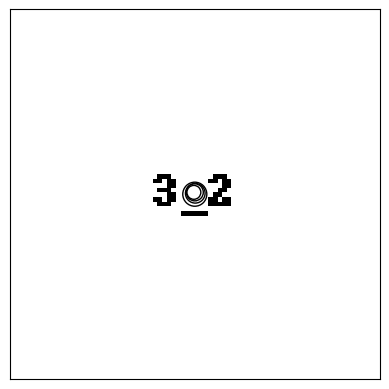

In [48]:
fig, ax = plt.subplots()

node_size = [node['ns'] for id, node in DG.nodes.data()]
images = [node['image'] for id, node in DG.nodes.data()]
nx.draw_networkx_nodes(DG, pos, node_size=node_size, node_color='white', edgecolors='black')

# Add the square images to the nodes
ax = plt.gca()
for node in range(5):
    x, y = pos[node + 1]
    print(x, y)
    print(x - node_size[node] / 2, x + node_size[node] / 2, y - node_size[node] / 2, y + node_size[node] / 2)
    ax.imshow(images[node], extent=(x - node_size[node] / 2, x + node_size[node] / 2, y - node_size[node] / 2, y + node_size[node] / 2), zorder=1)

# Draw the edges
nx.draw_networkx_edges(DG, pos)

# Show the plot
plt.show()

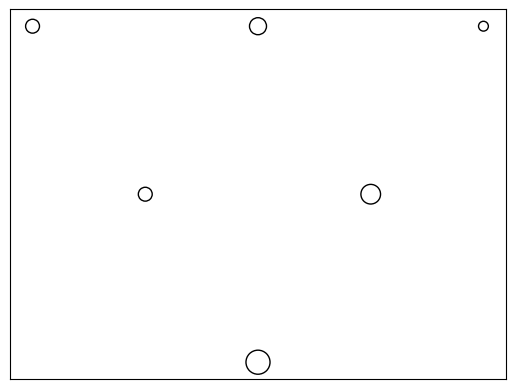

In [113]:
#pos = nx.nx_agraph.pyplot_layout(G)

# Plot the graph
DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (1, 3), (3, 4), (3, 5), (2, 6)])

DG.nodes[1]['res'] = 1
DG.nodes[2]['res'] = 2
DG.nodes[3]['res'] = 2
DG.nodes[4]['res'] = 3
DG.nodes[5]['res'] = 3
DG.nodes[6]['res'] = 3

DG.nodes[1]['ns'] = 300
DG.nodes[2]['ns'] = 200
DG.nodes[3]['ns'] = 100
DG.nodes[4]['ns'] = 50
DG.nodes[5]['ns'] = 150
DG.nodes[6]['ns'] = 100

for i, img in enumerate(['1_1', '2_1', '2_2', '3_1', '3_2', '3_3']):
    path = f'/Users/benbarlow/dev/clustree/tests/data/input/{img}.png'
    DG.nodes[i + 1]['image'] = Image.open(Path(path))
    
pos = nx.multipartite_layout(DG, subset_key='res', align='horizontal')

node_size = [node['ns'] for id, node in DG.nodes.data()]
images = [node['image'] for id, node in DG.nodes.data()]

fig, ax = plt.subplots()

nodes = nx.draw_networkx_nodes(DG, pos, node_size=node_size, node_color='white', edgecolors='black')

# Convert the node positions from data space to coordinate space
#coord_pos = {id: ax.transData.transform(pos[id]) for id, node in DG.nodes().data()}

#plt.tight_layout()

In [100]:
node_sizes = {node: size/72.0 for node, size in nx.get_node_attributes(DG, 'node_size').items()}
node_sizes = {node: size*ax.transData.transform((0, size))[1] for node, size in node_sizes.items()}
node_sizes

{}

In [91]:
import collections
pos_od = collections.OrderedDict(sorted(pos.items()))

for id, ele in pos_od.items():
    print(id, ax.transData.transform(ele))
    print(id, ax.transData.transform(ele))
    print(id, ax.transFigure.transform(ele))

1 [  80.  -316.8]
1 [  80.  -316.8]


AttributeError: 'AxesSubplot' object has no attribute 'transFigure'

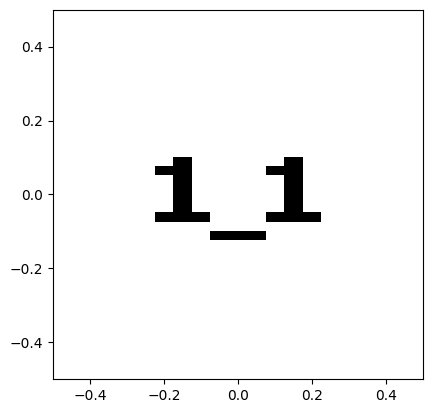

In [111]:
import numpy as np

img = DG.nodes[1]['image']

fig, ax = plt.subplots()

# Plot a circle
circle = plt.Circle((0, 0), 10, color='black', fill=False)
ax.add_artist(circle)

# Get the size of the circle in data space and coordinate space
data_size = circle.get_radius() * 2
display_size = ax.transData.transform([data_size, data_size])[0] - ax.transData.transform([0, 0])[0]

# Plot the image
image = plt.imshow(img, extent=(-0.5, 0.5, -0.5, 0.5))

# Get the size and center of the image in data space and coordinate space
data_extent = [ele * 0.2 for ele in image.get_extent()]
data_center = np.mean(data_extent[:2]), np.mean(data_extent[2:])
display_extent = ax.transData.transform(data_extent)
display_center = np.mean(display_extent[:2]), np.mean(display_extent[2:])

# Place the image at the center of the circle
image.set_transform(ax.transData)
#image.set_offset(data_center)

plt.show()

In [112]:
display_size

992000.0

In [ ]:
# positions of nodes: data space

# plot nodes: this will give access to transform()

# get radius of node


In [124]:
type(nodes)

matplotlib.collections.PathCollection

In [122]:
nodes.properties()['paths'][0]

Path(array([[ 0.        , -0.5       ],
       [ 0.13260155, -0.5       ],
       [ 0.25978994, -0.44731685],
       [ 0.35355339, -0.35355339],
       [ 0.44731685, -0.25978994],
       [ 0.5       , -0.13260155],
       [ 0.5       ,  0.        ],
       [ 0.5       ,  0.13260155],
       [ 0.44731685,  0.25978994],
       [ 0.35355339,  0.35355339],
       [ 0.25978994,  0.44731685],
       [ 0.13260155,  0.5       ],
       [ 0.        ,  0.5       ],
       [-0.13260155,  0.5       ],
       [-0.25978994,  0.44731685],
       [-0.35355339,  0.35355339],
       [-0.44731685,  0.25978994],
       [-0.5       ,  0.13260155],
       [-0.5       ,  0.        ],
       [-0.5       , -0.13260155],
       [-0.44731685, -0.25978994],
       [-0.35355339, -0.35355339],
       [-0.25978994, -0.44731685],
       [-0.13260155, -0.5       ],
       [ 0.        , -0.5       ],
       [ 0.        , -0.5       ]]), array([ 1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        

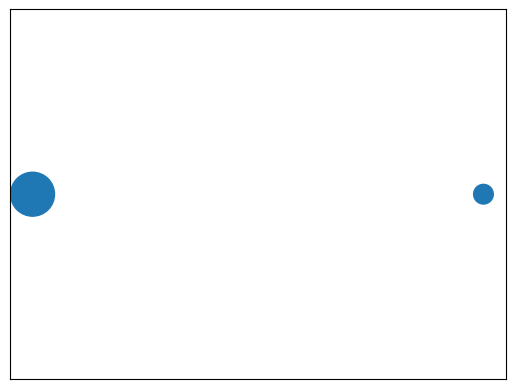

In [142]:
import numpy as np

fig, ax = plt.subplots()

DG = nx.DiGraph()
DG.add_edges_from([(1, 2)])

DG.nodes[1]['res'] = 1
DG.nodes[2]['res'] = 2

DG.nodes[1]['ns'] = 300
DG.nodes[2]['ns'] = 200

pos = nx.multipartite_layout(DG, subset_key='res')

pos = {1: np.asarray([-0.1,  0]), 2: np.asarray([0.1, 0])}

nx.draw_networkx_nodes(
    DG,
    pos=pos,
    node_size=[1000, 200]
)

In [145]:
ax.transData.transform(pos[1]), ax.transData.transform(pos[2])

(array([102.54545455, 237.6       ]), array([553.45454545, 237.6       ]))

In [147]:
ax.transAxes.transform(pos[1]), ax.transAxes.transform(pos[2])

(array([30.4, 52.8]), array([129.6,  52.8]))

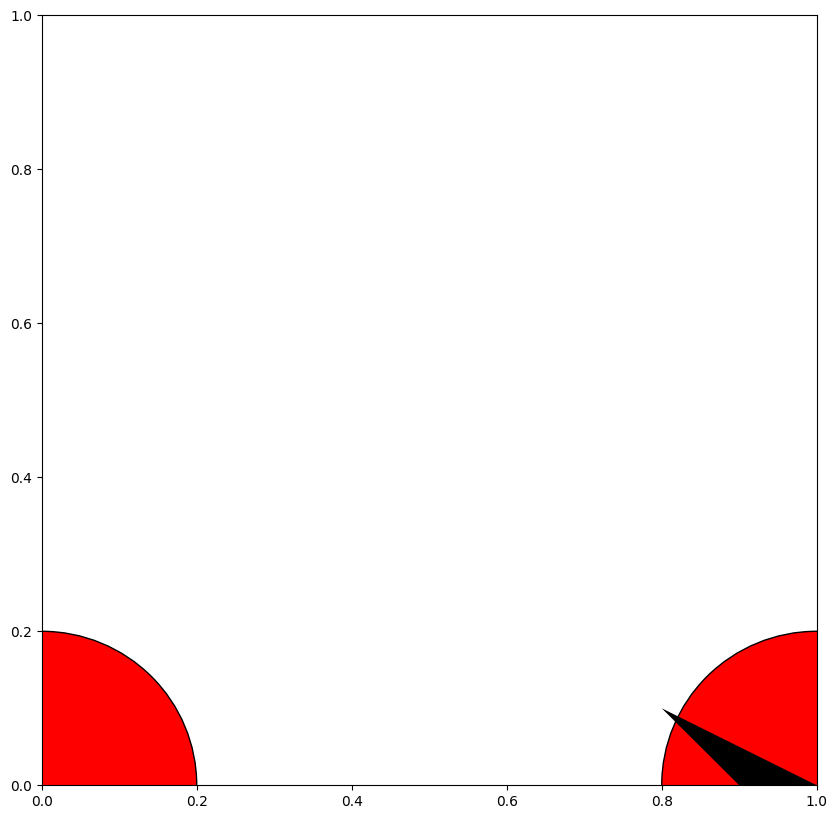

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.path as mpath


fig, ax = plt.subplots(figsize=(10, 10))
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
circles = []
arrows = []
for i in range(n):
    # Generate a circle path
    circle = mpath.Path.circle((i, 0), 0.2)
    circles.append(circle)
    if i > 0:
        # Generate arrow path
        arrow = [
            (i-0.1, 0), # start point
            (i-0.2, 0.1), # first control point
            (i, 0), # end point
            (i-0.2, -0.1), # second control point
            (i-0.1, 0), # end of arrow head
        ]
        arrows.append(arrow)
# Plot the circles and arrows
circle_coll = mpl.collections.PathCollection(circles, facecolor="red", edgecolor="black", lw=1)
ax.add_collection(circle_coll)
arrow_coll = mpl.collections.PathCollection([mpath.Path(arrow) for arrow in arrows], facecolor="black")
ax.add_collection(arrow_coll)
#ax.set_xlim(-0.5, n+0.5)
#ax.set_ylim(-1, 1)
#plt.tight_layout()
plt.show()


[[(0.9, 0), (0.8, 0.1), (1, 0), (0.8, -0.1), (0.9, 0)],
 [(1.9, 0), (1.8, 0.1), (2, 0), (1.8, -0.1), (1.9, 0)],
 [(2.9, 0), (2.8, 0.1), (3, 0), (2.8, -0.1), (2.9, 0)],
 [(3.9, 0), (3.8, 0.1), (4, 0), (3.8, -0.1), (3.9, 0)],
 [(4.9, 0), (4.8, 0.1), (5, 0), (4.8, -0.1), (4.9, 0)]]

In [162]:
[mpl.Path(arrow) for arrow in arrows]

TypeError: expected str, bytes or os.PathLike object, not list

In [164]:
arrows[0]

[(0.9, 0), (0.8, 0.1), (1, 0), (0.8, -0.1), (0.9, 0)]

In [167]:
import matplotlib.path as mpath

# Define a set of vertices for the path
vertices = [
    (0, 0),  # start point
    (0, 1),  # first control point
    (1, 1),  # second control point
    (1, 0),  # end point
]

# Create a Path object
path = mpath.Path(arrows[0])

In [171]:
images

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>]

In [303]:
mpl.use('Agg')

for img_name in [f'{k_upper}_{k_lower}' for k_upper in range(1, 4) for k_lower in range(1, 4) if k_lower <= k_upper]:
    img = plt.imread(f'/Users/benbarlow/dev/clustree/tests/data/input/{img_name}.png')
    print(type(img))
    # Create a figure and axis to plot the image
    fig, ax = plt.subplots()
    
    # Plot the image
    ax.imshow(img, extent=[0, 40, 0, 40])

    # Get the width of the image
    img_width = img.shape[1]
    print(img_width)
    # Calculate the radius of the circle
    radius = img_width / 10

    # Get the top right corner of the image
    x0 = img_width - radius
    y0 = 40 - radius
    print(x0, y0)

    # Create a circle at the top right of the image
    circle = plt.Circle((x0, y0), radius=radius, fill=True, color='red')

    # Add the circle to the axis
    ax.add_artist(circle)

    #plt.tight_layout()

    #ax.axvline(x=40, color='red', ls='--', lw=1)

    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    #ax.get_xaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([])


    fig.patch.set_visible(False)
    ax.axis('off')

    # Save the plot as a PNG
    out = f'/Users/benbarlow/dev/clustree/tests/data/input/edit_{img_name}.png'
    plt.savefig(out, dpi=200, bbox_inches='tight')
    # plt.savefig(out, dpi=300, bbox_inches='tight', pad_inches=0)

<class 'numpy.ndarray'>
40
36.0 36.0
<class 'numpy.ndarray'>
40
36.0 36.0
<class 'numpy.ndarray'>
40
36.0 36.0
<class 'numpy.ndarray'>
40
36.0 36.0
<class 'numpy.ndarray'>
40
36.0 36.0
<class 'numpy.ndarray'>
40
36.0 36.0


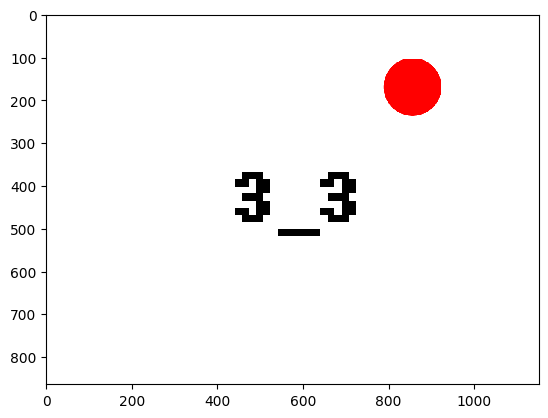

In [292]:
%matplotlib inline

plt.imshow(get_img_from_fig(fig), interpolation='nearest')
plt.show()


In [283]:
import io
import cv2

def get_img_from_fig(fig, dpi=180):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img

In [232]:
import PIL

DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (1, 3), (3, 4), (3, 5), (2, 6)])

DG.nodes[1]['res'] = 1
DG.nodes[2]['res'] = 2
DG.nodes[3]['res'] = 2
DG.nodes[4]['res'] = 3
DG.nodes[5]['res'] = 3
DG.nodes[6]['res'] = 3

ind = {f'{k_upper}_{k_lower}' for k_upper in range(1, 4) for k_lower in range(1, 4) if k_lower <= k_upper}
imgs = {
    key: plt.imread(f'/Users/benbarlow/dev/clustree/tests/data/input/edit_{key}.png')
    for key in ind
}

DG.nodes[1]['image'] = imgs['1_1']
DG.nodes[2]['image'] = imgs['2_1']
DG.nodes[3]['image'] = imgs['2_2']
DG.nodes[4]['image'] = imgs['3_1']
DG.nodes[5]['image'] = imgs['3_2']
DG.nodes[6]['image'] = imgs['3_3']

pos = nx.multipartite_layout(DG, subset_key='res', align='horizontal')

numpy.ndarray

(-0.9075, 0.9075, -1.1575, 0.6575)

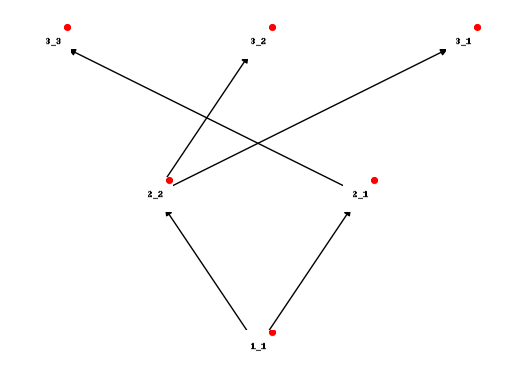

In [272]:
fig, ax = plt.subplots()

nx.draw_networkx_edges(DG, pos, node_shape='s')

tr_figure = ax.transData.transform
# Transform from display to figure coordinates
tr_axes = fig.transFigure.inverted().transform

ax_range = ax.get_xlim()[1] - ax.get_xlim()[0]
icon_size = ax_range * 0.04
icon_center = icon_size / 2.0

for n in DG.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))
    # get overlapped axes and plot icon
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    
    a.imshow(DG.nodes[n]["image"])

    a.patch.set_visible(False)
    a.axis('off')

ax.axis('off')

In [258]:
img = plt.imread(f'/Users/benbarlow/dev/clustree/tests/data/input/{img_name}.png')

img2 = np.array(PIL.Image.open(f'/Users/benbarlow/dev/clustree/tests/data/input/{img_name}.png'))

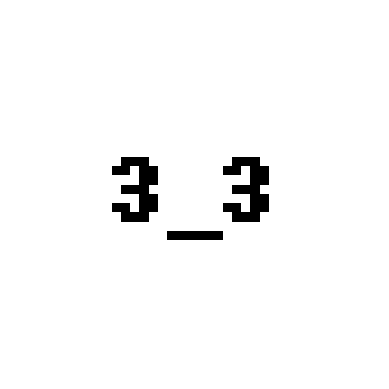

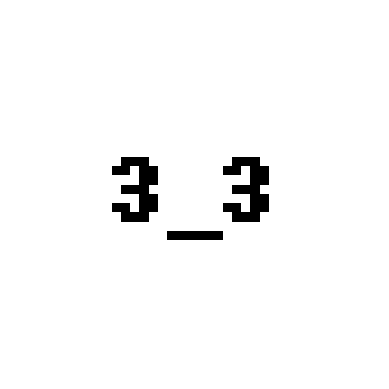

In [267]:
%matplotlib inline

fig, ax = plt.subplots()

ax.imshow(img)

fig.patch.set_visible(False)
ax.axis('off')

plt.show()


fig, ax = plt.subplots()

ax.imshow(img2)

fig.patch.set_visible(False)
ax.axis('off')

plt.show()

In [309]:
from collections import defaultdict

d = defaultdict(dict)
for k, v in images.items():
    d[k[0]][k[2]] = v

In [310]:
d

defaultdict(dict,
            {'3': {'3': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>,
              '1': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>,
              '2': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>},
             '1': {'1': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>},
             '2': {'2': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>,
              '1': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>}})

In [306]:
ind = {f'{k_upper}_{k_lower}' for k_upper in range(1, 4) for k_lower in range(1, 4) if k_lower <= k_upper}

images = {i: img for i, img in zip(ind, images)}

In [308]:
images

new_image = {}
for key in images.keys():
    
{key[0]: {key_inner[2]: img} for key, img in images.items()}

{'3': {'2': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>},
 '1': {'1': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>},
 '2': {'1': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=40x40>}}